In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,batAvg,hitsPerGame
226,abreubo01,1974.0,3.0,11.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,0.254799,0.948052
227,abreubo01,1974.0,3.0,11.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,0.252988,0.894366
229,abreubo01,1974.0,3.0,11.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,0.246154,0.521739
230,abreubo01,1974.0,3.0,11.0,Venezuela,Aragua,Maracay,NaN,NaN,NaN,...,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,0.248120,0.423077
232,abreujo02,1987.0,1.0,29.0,Cuba,Cienfuegos,Cienfuegos,NaN,NaN,NaN,...,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,0.316547,1.213793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104285,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,NaN,NaN,NaN,...,0.0,16,49.0,0.0,3.0,0.0,1.0,5.0,0.213873,0.711538
104286,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,NaN,NaN,NaN,...,3.0,17,158.0,1.0,17.0,0.0,4.0,12.0,0.198630,0.664122
104287,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,NaN,NaN,NaN,...,1.0,21,132.0,0.0,5.0,8.0,2.0,6.0,0.174286,0.544643
104288,zuninmi01,1991.0,3.0,25.0,USA,FL,Cape Coral,NaN,NaN,NaN,...,0.0,21,65.0,0.0,6.0,0.0,1.0,0.0,0.207317,0.618182


1438
2484
603
Mean HPG for left-handed batters: 0.7486181972054805
Mean HPG for right-handed batters: 0.7465635464536055
Mean HPG for switch-hitters: 0.7683785674704149


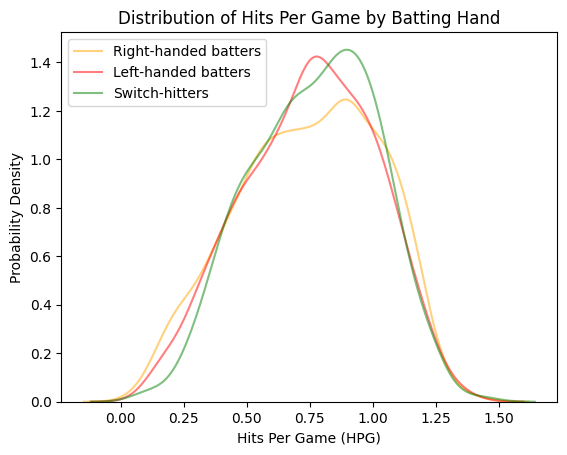

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

people = pd.read_csv('baseball/core/People.csv')
batting = pd.read_csv('baseball/core/Batting.csv')
batting['batAvg'] = batting.H/batting.AB
batting['hitsPerGame'] = batting.H/batting.G

playerHits = pd.merge(people, batting, on='playerID')
recentPlayersAndBatting = playerHits[playerHits['yearID'] >= 2010] # Only include data from 2010 and beyond
recentPlayersAndBatting = recentPlayersAndBatting[recentPlayersAndBatting['AB'] >= 50] # Only count players who went up to bat at least 50 times
display(recentPlayersAndBatting)

# In the final trimmed table, there are about 50% as many lefties as there are righties. That's kind of interesting
recentPlayersAndBattingL = recentPlayersAndBatting[recentPlayersAndBatting['bats'] == 'L']
recentPlayersAndBattingR = recentPlayersAndBatting[recentPlayersAndBatting['bats'] == 'R']
recentPlayersAndBattingB = recentPlayersAndBatting[recentPlayersAndBatting['bats'] == 'B']
print(len(recentPlayersAndBattingL))
print(len(recentPlayersAndBattingR))
print(len(recentPlayersAndBattingB))
meanHPGleft = recentPlayersAndBattingL['hitsPerGame'].mean()
meanHPGright = recentPlayersAndBattingR['hitsPerGame'].mean()
meanHPGboth = recentPlayersAndBattingB['hitsPerGame'].mean()
print(f"Mean HPG for left-handed batters: {meanHPGleft}")
print(f"Mean HPG for right-handed batters: {meanHPGright}")
print(f"Mean HPG for switch-hitters: {meanHPGboth}")

# Plot data
sns.kdeplot(data=recentPlayersAndBattingR, x='hitsPerGame', label='Right-handed batters', color='orange', alpha=0.5)
sns.kdeplot(data=recentPlayersAndBattingL, x='hitsPerGame', label='Left-handed batters', color='red', alpha=0.5)
sns.kdeplot(data=recentPlayersAndBattingB, x='hitsPerGame', label='Switch-hitters', color='green', alpha=0.5)

# Add labels and title
plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Distribution of Hits Per Game by Batting Hand')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [37]:
streakHitting = batting[batting['hitStreak'].notna()]
sns.scatterplot(x='yearID', y='hitStreak', data=streakHitting, s=100, color='blue')

plt.title('All Hitting Streaks Over 30 in MLB History')
plt.xlabel('Year')
plt.ylabel('Hit Streak')
plt.show()

NameError: name 'batting' is not defined

In [38]:
meanHPG = recentPlayersAndBatting['hitsPerGame'].mean()
HPGlength = len(recentPlayersAndBatting['hitsPerGame'])
HPGover1 = (recentPlayersAndBatting['hitsPerGame'] >= 1).sum()
HPGunder1 = (recentPlayersAndBatting['hitsPerGame'] < 1).sum()
HPGover1asPercent = HPGover1 * 100 / HPGlength
HPGunder1asPercent = HPGunder1 * 100 / HPGlength

print(f"Mean hits per game since 2010: {meanHPG}")
print(f"Number of times a player averaged at least one hit per game since 2010: {HPGover1} ({HPGover1asPercent}%)")
print(f"Number of times a player averaged under one hit per game since 2010: {HPGunder1} ({HPGunder1asPercent}%)")

Mean hits per game since 2010: 0.7501235564987618
Number of times a player averaged at least one hit per game since 2010: 945 (20.883977900552487%)
Number of times a player averaged under one hit per game since 2010: 3580 (79.11602209944752%)


<Axes: xlabel='batAvg', ylabel='hitsPerGame'>

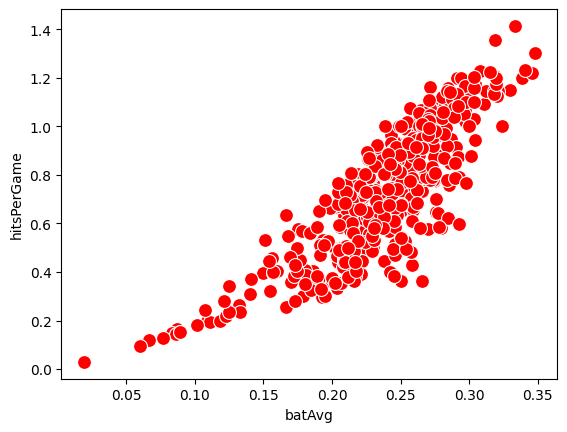

In [39]:
sns.scatterplot(x='batAvg', y='hitsPerGame', data=recentPlayersAndBatting.sample(frac=.1), s=100, color='red')

<Axes: xlabel='AB', ylabel='hitsPerGame'>

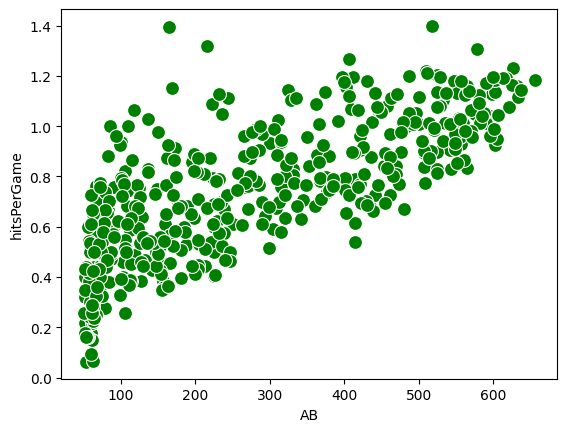

In [40]:
sns.scatterplot(x='AB', y='hitsPerGame', data=recentPlayersAndBatting.sample(frac = .1), s = 100, color='green')

1664
0.7889016156067957
-----
2861
0.7275696626309643


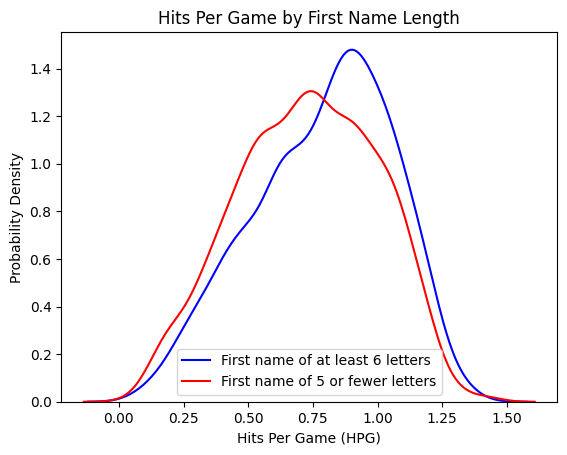

In [41]:
cat1 = recentPlayersAndBatting[recentPlayersAndBatting['nameFirst'].apply(len) >= 6]
cat2 = recentPlayersAndBatting[recentPlayersAndBatting['nameFirst'].apply(len) < 6]

print(len(cat1))
print(cat1['hitsPerGame'].mean())
print("-----")
print(len(cat2))
print(cat2['hitsPerGame'].mean())

sns.kdeplot(data=cat1, x='hitsPerGame', label='First name of at least 6 letters', color='blue')
sns.kdeplot(data=cat2, x='hitsPerGame', label='First name of 5 or fewer letters', color='red')

# Add labels and title
plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by First Name Length')

# Add legend
plt.legend()

# Show the plot
plt.show()

2151
0.7470891695173512
-----
2374
0.752872910499189


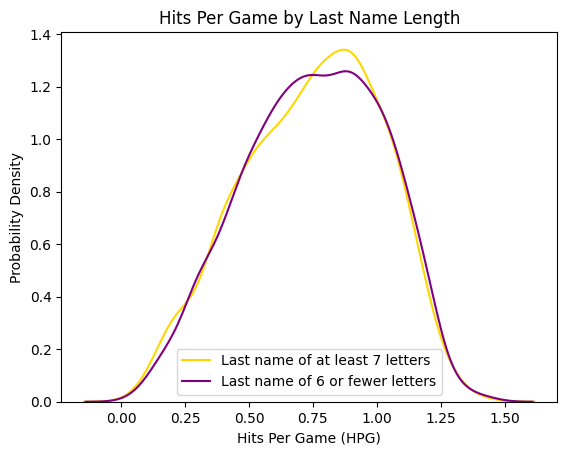

In [42]:
cat1 = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) >= 7]
cat2 = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) < 7]

print(len(cat1))
print(cat1['hitsPerGame'].mean())
print("-----")
print(len(cat2))
print(cat2['hitsPerGame'].mean())

sns.kdeplot(data=cat1, x='hitsPerGame', label='Last name of at least 7 letters', color='gold')
sns.kdeplot(data=cat2, x='hitsPerGame', label='Last name of 6 or fewer letters', color='purple')

# Add labels and title
plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by Last Name Length')

# Add legend
plt.legend()

# Show the plot
plt.show()

2292
0.7654766354498603
-----
2233
0.734364820737043


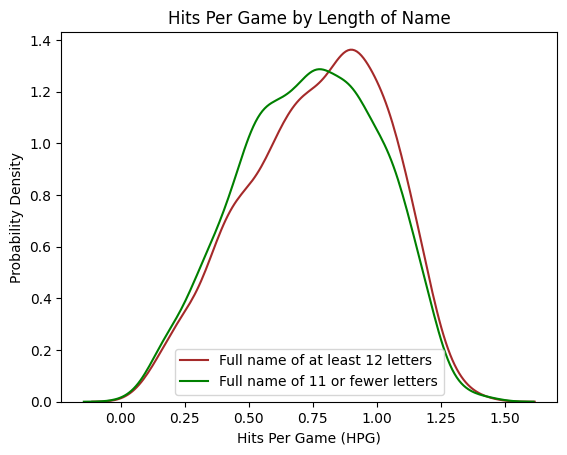

In [43]:
cat1 = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) + recentPlayersAndBatting['nameFirst'].apply(len) >= 12]
cat2 = recentPlayersAndBatting[recentPlayersAndBatting['nameLast'].apply(len) + recentPlayersAndBatting['nameFirst'].apply(len) < 12]

print(len(cat1))
print(cat1['hitsPerGame'].mean())
print("-----")
print(len(cat2))
print(cat2['hitsPerGame'].mean())

sns.kdeplot(data=cat1, x='hitsPerGame', label='Full name of at least 12 letters', color='brown')
sns.kdeplot(data=cat2, x='hitsPerGame', label='Full name of 11 or fewer letters', color='green')

# Add labels and title
plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by Length of Name')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Comparing hits per game by nationality

### With a graph

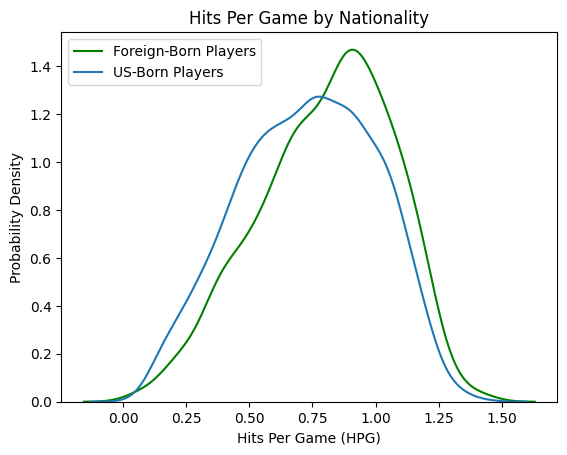

In [53]:
foreign = recentPlayersAndBatting[recentPlayersAndBatting['birthCountry'] != 'USA']
domestic = recentPlayersAndBatting[recentPlayersAndBatting['birthCountry'] == 'USA']

sns.kdeplot(data=foreign, x='hitsPerGame', color='green', label='Foreign-Born Players')
sns.kdeplot(data=domestic, x='hitsPerGame', label='US-Born Players')

plt.xlabel('Hits Per Game (HPG)')
plt.ylabel('Probability Density')
plt.title('Hits Per Game by Nationality')
plt.legend()

plt.show()

### Comparing means

In [55]:
print('hits per game - foreign -> domestic')
display(foreign['hitsPerGame'].mean())
display(domestic['hitsPerGame'].mean())
display(recentPlayersAndBatting['hitsPerGame'].mean())

hits per game - foreign -> domestic


0.802397875407456

0.7281539039505066

0.7501235564987618